In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder
import warnings
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("loan_approved.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.dtypes

Loan_ID                    object
Gender                     object
Married                    object
Dependents                 object
Education                  object
Self_Employed              object
ApplicantIncome             int64
CoapplicantIncome         float64
LoanAmount                float64
Loan_Amount_Term          float64
Credit_History            float64
Property_Area              object
Loan_Status (Approved)     object
dtype: object

In [5]:
df.isnull().sum()
# for all the columns which are object - mode for imputation
# for all continuous col - either mean or median
# for descrete numerical col - mode for imputation

Loan_ID                    0
Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

## Imputation Methods
- Replacing missing values with estimated values.
- Preserves sample size: Doesn’t reduce data points.
- Can introduce bias: Estimated values might not be accurate.
- Here are some common imputation methods:

- Mean, Median, and Mode Imputation:

- Replace missing values with the mean, median, or mode of the relevant variable.
- Simple and efficient: Easy to implement.

In [8]:
df['Gender'].mode()[0]

'Male'

In [9]:
df.loc[df['Gender'].isnull()==True , 'Gender'] = df['Gender'].mode()[0]

In [10]:
df.Gender.isnull().sum()

np.int64(0)

In [11]:
df.loc[df['Married'].isnull()==True , 'Married'] = df['Married'].mode()[0]
df.loc[df['Dependents'].isnull()==True , 'Dependents'] = df['Dependents'].mode()[0]
df.loc[df['Self_Employed'].isnull()==True , 'Self_Employed'] = df['Self_Employed'].mode()[0]

In [12]:
df.isnull().sum()

Loan_ID                    0
Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

In [13]:
df.loc[df['Credit_History'].isnull(),'Credit_History']= df['Credit_History'].mode()[0]
# We have imputed the null values with the mode
# the column is a descrete numerical column

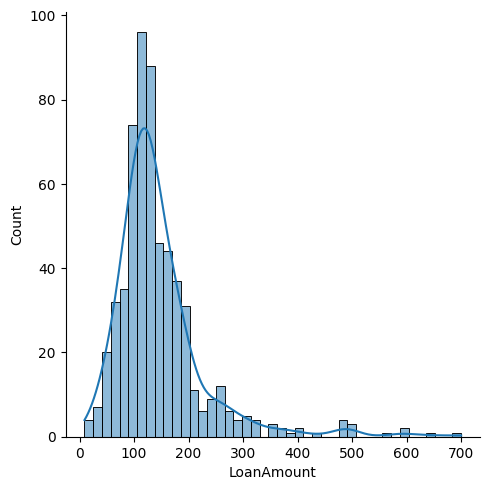

In [16]:
sns.displot(x=df['LoanAmount'],kde=True)

In [17]:
df.loc[df['LoanAmount'].isnull(),'LoanAmount'] = df['LoanAmount'].median()
# We have imputed the null values with the median since the data has skewed distribution

In [18]:
df['Loan_Amount_Term'].nunique()
# since the column loan amount term is a descrete column
# we are imputing with mode of the column

10

In [19]:
df.loc[df['Loan_Amount_Term'].isnull(),'Loan_Amount_Term']= df['Loan_Amount_Term'].mode()[0]


In [20]:
df.isnull().sum()

Loan_ID                   0
Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Property_Area             0
Loan_Status (Approved)    0
dtype: int64

<Axes: xlabel='LoanAmount'>

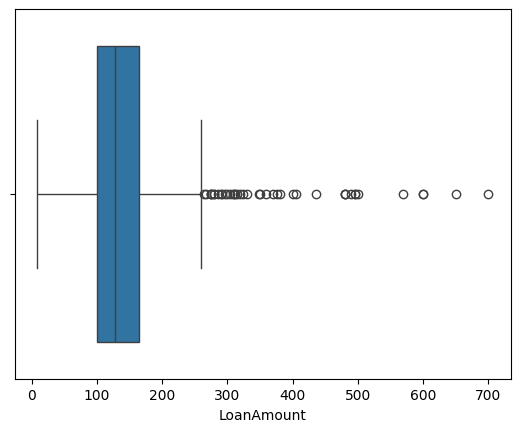

In [21]:
sns.boxplot(x=df['LoanAmount'])

In [22]:
Q1 = df['LoanAmount'].quantile(0.25) # q1

Q3 = df['LoanAmount'].quantile(0.75) # q3

In [23]:
IQR = Q3 - Q1
IQR

np.float64(64.5)

In [24]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [25]:
print(lower_bound)
print(upper_bound)

3.5
261.5


In [26]:
df = df[(df['LoanAmount'] >= lower_bound) & (df['LoanAmount'] <= upper_bound)]

<Axes: xlabel='LoanAmount'>

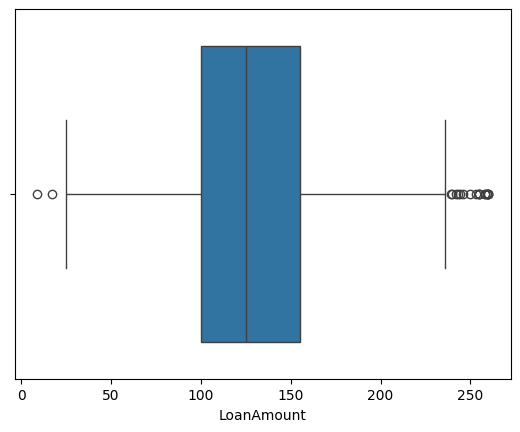

In [27]:
sns.boxplot(x=df['LoanAmount'])

# Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Fit and transform the 'matchType' column to obtain label-encoded values
df['Married'] = encoder.fit_transform(df['Married'])

# Display the result
print(df[['Married']])

     Married
0          0
1          1
2          1
3          1
4          0
..       ...
609        0
610        1
611        1
612        1
613        0

[573 rows x 1 columns]


C:\Users\hp\AppData\Local\Temp\ipykernel_16536\1181501829.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Married'] = encoder.fit_transform(df['Married'])


In [29]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,0,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,0,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,1,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,1,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,1,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [31]:
df = pd.get_dummies(df, columns=['Gender'],dtype='int',drop_first=True)


In [32]:
df

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),Gender_Male
0,LP001002,0,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,1
1,LP001003,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1
2,LP001005,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,LP001006,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,LP001008,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,0
610,LP002979,1,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,1
611,LP002983,1,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,1
612,LP002984,1,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,1
